# This notebook predicts the presence of heart disease based on a number of feature columns. The notebook is split in to 5 sections: investigating the data, preprocessing the data, applying different classification models and analysing those models, tuning parameters and applying the model to new data.

## Section 1: investigating the data

In [1]:
# Import all required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib.font_manager
from sklearn.model_selection import train_test_split
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.linear_model import *
import joblib

# Set Pandas to show all columns
pd.set_option('display.max_columns', None)

In [2]:
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/LJRobertshaw98/HeartDiseaseML/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Check for nulls
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Check means to get an idea of the scale of the data
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [5]:
# Count heart disease absence
df_1 = df[(df['target']==1)]
no_heart_disease = df_1['target'].count()
no_heart_disease_percentage = round(((no_heart_disease/(len(df['target'])))*100),2)

# Count heart disease presence
df_0 = df[(df['target']==0)]
heart_disease = df_0['target'].count()
heart_disease_percentage = round(((1 - (no_heart_disease_percentage/100))*100),2)

# Print results
print( 'Heart disease absent = ' + str(heart_disease) + ' out of ' + str(len(df['target'])) + ' rows (' + str(heart_disease_percentage)  + '%)')
print( 'Heart disease present = ' + str(no_heart_disease) + ' out of ' + str(len(df['target'])) + ' rows (' + str(no_heart_disease_percentage) + '%)')

Heart disease absent = 138 out of 303 rows (45.54%)
Heart disease present = 165 out of 303 rows (54.46%)


In [6]:
# Create lists of numeric and categorical feature columns
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [7]:
# Function plots scatter graph of two input arguments, split by heart disease presence - accepts column names as string
def scatter(x,y):
    
    # Split dataframe into heart disease present (0) and heart disease NOT present (1)
    df_0, df_1 = df.loc[df['target']==0], df.loc[df['target']==1]
    
    # Split dataset into X and Y values with and without heart disease
    x_0, x_1 = df_0[x], df_1[x]
    y_0, y_1 = df_0[y], df_1[y]
    
    # Define the figure
    fig = plt.figure(figsize=(10,6))
    
    # Plot a scatter graph of x against y
    plt.scatter(x_0,y_0, c='r', s=5, label='0')
    plt.scatter(x_1,y_1, c='g', s=5, label='1')
    
    # Fit a least-squares polynomial fit (line of best fit) to the data
    m_0, b_0 = np.polyfit(x_0, y_0, 1)
    m_1, b_1 = np.polyfit(x_1, y_1, 1)
    
    # Plot the line of best fit on the figure
    plt.plot(x_0, m_0*x_0 + b_0, 'g')
    plt.plot(x_1, m_1*x_1 + b_1, 'r')
    
    # Plot mean lines
    mean_0, mean_1 = [np.mean(y_0)]*len(x_0), [np.mean(y_1)]*len(x_1)
    plt.plot(x_0, mean_0, label='Mean_0', linestyle='--', color='r')
    plt.plot(x_1, mean_1, label='Mean_1', linestyle='--', color='g')
    
    # Create the x axis label
    xlablist = list(pd.DataFrame(df[x]).columns)
    xlab = xlablist[0]
    plt.xlabel((str(xlab)).capitalize())
    
    # Create the y axis label
    ylablist = list(pd.DataFrame(df[y]).columns)
    ylab = ylablist[0]
    plt.ylabel((str(ylab)).capitalize())
    
    # Create the figure title
    title = 'Plot of ' + str(xlab) + ' against ' + str(ylab)
    fig.suptitle(title)
    
    # Create legend
    plt.legend(loc="upper left")
    
    # Print the equation of the line of best fit
    print('No heart disease: y = ' + str(round(m_0,2)) + '*x + ' + str(round(b_0,2)))
    print('Heart disease present: y = ' + str(round(m_1,2)) + '*x + ' + str(round(b_1,2)))
    
    # Show the plot
    plt.show()

In [8]:
# Function creates boxplot of a column split by heart disease presence, accepts column name as string
def boxplot(x):
    
    # Split dataframe into heart disease present (0) and heart disease NOT present (1)
    df_0, df_1 = df.loc[df['target']==0], df.loc[df['target']==1]
    
    # Define the column to visualise based on input string
    col_0, col_1 = df_0[x], df_1[x]

    # Create list of data to plot
    cols = [col_0, col_1]
    
    # Create figure and subplot
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    
    # Create the boxplot
    bp = ax.boxplot(cols)
    
    # Add figure title
    plt.suptitle('Boxplot of ' + x + ' split by heart disease present (0) and heart disease not present (1)')
    
    # Set x tick labels as 0 and 1 denoting heart disease presence
    ax.set_xticklabels(['0', '1'])
    
    # Set axes titles
    ax.set_ylabel(x.capitalize())
    ax.set_xlabel('Heart disease presence')
    
    # Display the figure
    plt.show(bp)

In [9]:
# Creates histogram and takes column name as string
def histogram(x):
    
    # Get column
    data = df[x]
    
    # Create figure
    fig = plt.figure(figsize=(10,4))
    
    # Create histogram
    plt.hist(data)
    
    # Add title and labels
    plt.title('Distribution of column: '+x)
    plt.xlabel(x.capitalize())
    plt.ylabel('Frequency')
    
    # Create stats
    data_min = data.min()
    data_max = data.max()
    data_mean = data.mean()
    data_med = data.median()
    data_mode = data.mode()[0]
    data_range = data_max - data_min
    
    # Plot stats on figure
    plt.axvline(x=data_min, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_max, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_mean, color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_med, color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_mode, color = 'cyan', linestyle='dashed', linewidth = 2)
    
    # Define x ticks
    plt.xticks(np.arange(data_min, data_max, (data_range/10)))
    
    # Print key stats to two decimal places
    print('Mean (red) = '+str(round(data_mean,2)))
    print('Median (yellow) = '+str(round(data_med,2)))
    print('Mode (cyan) = '+str(round(data_mode,2)))
    
    # Display the figure
    plt.show()

In [10]:
# Creates a density distribution plot of a column, column name accepted as string
def distribution(x):

    # Get data
    data = df[x]
    
    # Create the figure
    fig = plt.figure(figsize=(10,4))

    # Plot distribution
    data.plot.density()

    # Add titles and labels
    plt.title('Distribution of: '+x)

    # Create stats
    data_min = data.min()
    data_max = data.max()
    data_mean = data.mean()
    data_med = data.median()
    data_mode = data.mode()[0]
    data_range = data_max - data_min
    
    # Plot stats on figure
    plt.axvline(x=data_min, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_max, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_mean, color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_med, color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data_mode, color = 'cyan', linestyle='dashed', linewidth = 2)

    # Define x label
    plt.xlabel(x.capitalize())
    
    # Print key stats to two decimal places
    print('Mean (red) = '+str(round(data_mean,2)))
    print('Median (yellow) = '+str(round(data_med,2)))
    print('Mode (cyan) = '+str(round(data_mode,2)))
    
    # Show the figure
    plt.show()

In [11]:
def categorical_bar(x):
    
    # Split dataframe into heart disease present (0) and heart disease NOT present (1)
    df_0, df_1 = df.loc[df['target']==0], df.loc[df['target']==1]
    
    # Define the column to visualise based on input string
    col_0, col_1 = df_0[x], df_1[x]
    
    # Count number of times category occurs
    counts_0 = col_0.value_counts().sort_index()
    counts_1 = col_1.value_counts().sort_index()
    
    # Sort data from 0 upwards
    Y = np.arange(df[x].nunique())
    
    # Plot bar charts for both heart disease presence and absence
    plt.bar(Y - 0.1, counts_0, color = 'r', width = 0.2)
    plt.bar(Y + 0.1, counts_1, color = 'g', width = 0.2)
    
    # Change x ticks to tick with category
    plt.xticks(Y)
    
    # Change axis labels
    plt.xlabel(x.capitalize())
    plt.ylabel('Count')
    
    # Create figure title
    plt.suptitle('Count of ' + x + ', split by heart disease presence (red = present, green = absent)')
    
    # Display the figure
    plt.show()

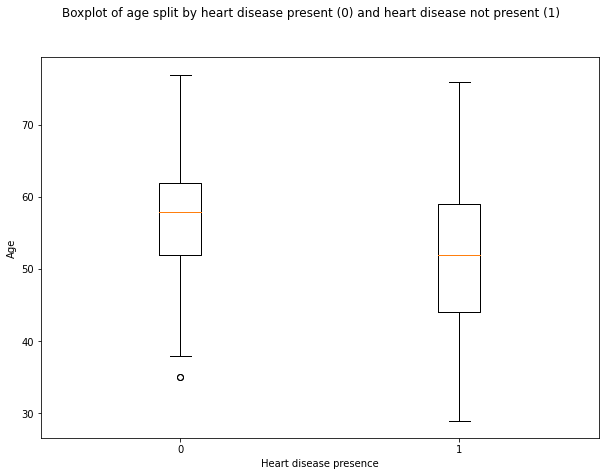


-----------------------------------------------------------------------------------------------------------------------------



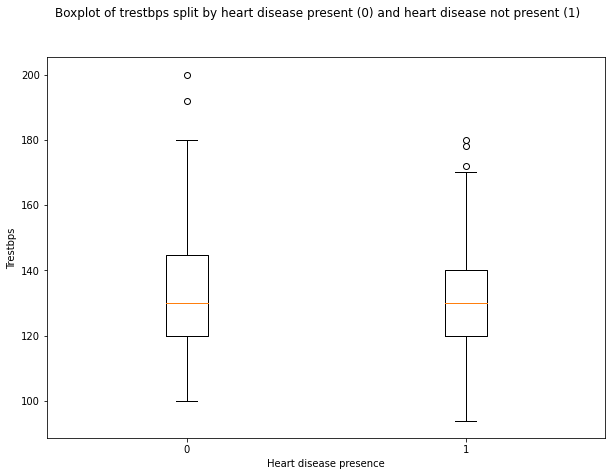


-----------------------------------------------------------------------------------------------------------------------------



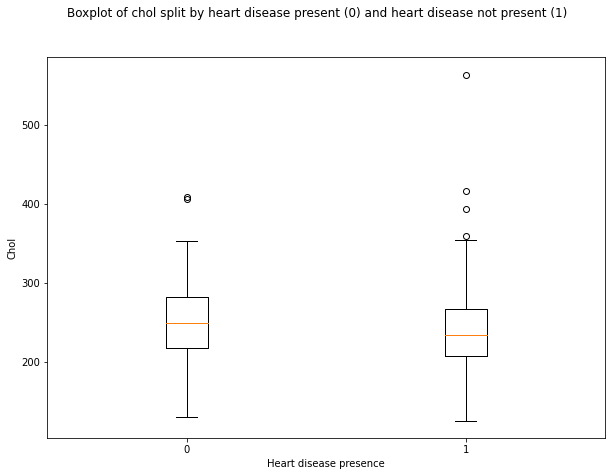


-----------------------------------------------------------------------------------------------------------------------------



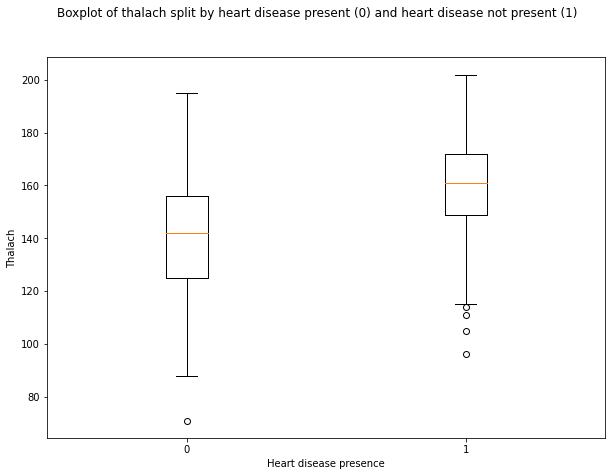


-----------------------------------------------------------------------------------------------------------------------------



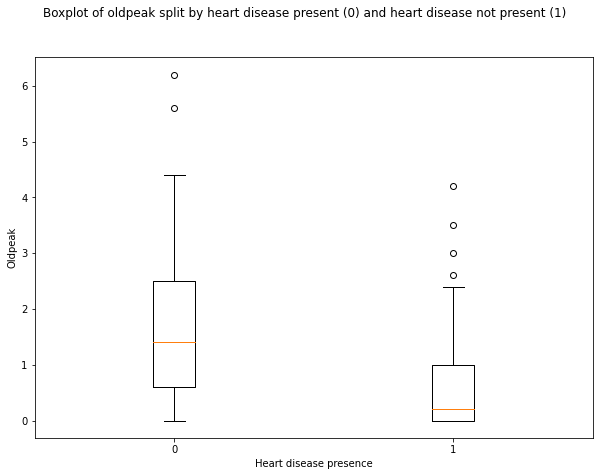


-----------------------------------------------------------------------------------------------------------------------------



In [12]:
# Create a boxplot for each numeric feature column
for col in numeric:
    boxplot(col)
    print('\n''-----------------------------------------------------------------------------------------------------------------------------''\n')

Mean (red) = 54.37
Median (yellow) = 55.0
Mode (cyan) = 58


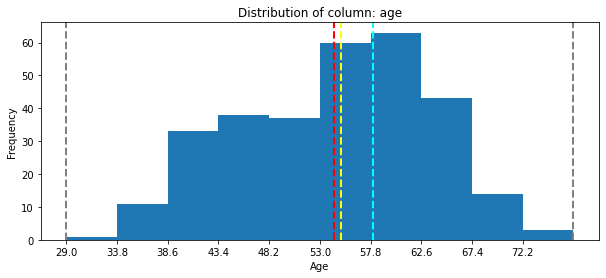


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 131.62
Median (yellow) = 130.0
Mode (cyan) = 120


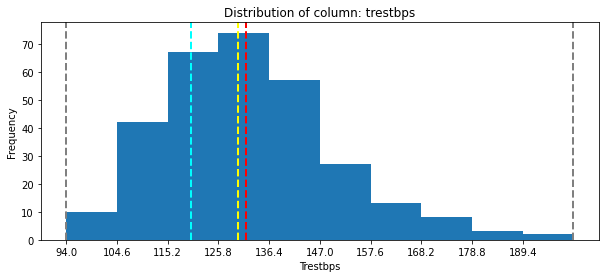


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 246.26
Median (yellow) = 240.0
Mode (cyan) = 197


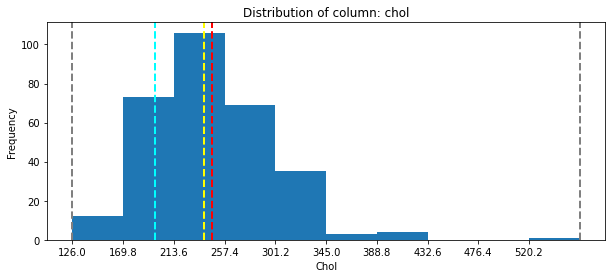


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 149.65
Median (yellow) = 153.0
Mode (cyan) = 162


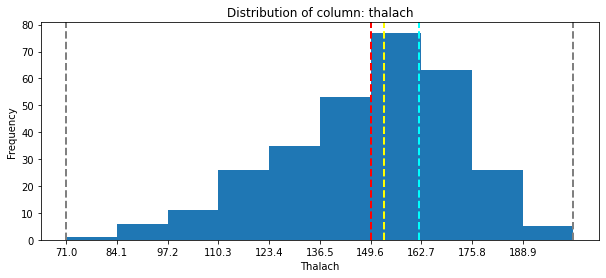


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 1.04
Median (yellow) = 0.8
Mode (cyan) = 0.0


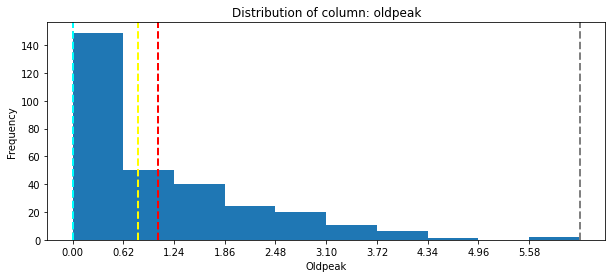


-----------------------------------------------------------------------------------------------------------------------------



In [13]:
# Create a histogram for each numeric feature column
for col in numeric:
    histogram(col)
    print('\n''-----------------------------------------------------------------------------------------------------------------------------''\n')

Mean (red) = 54.37
Median (yellow) = 55.0
Mode (cyan) = 58


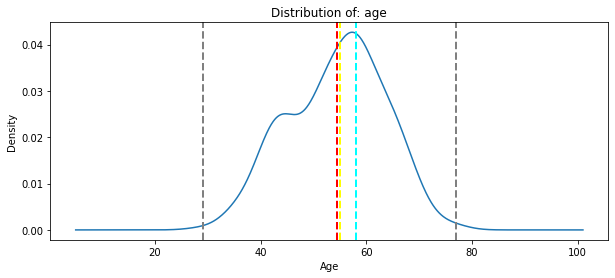


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 131.62
Median (yellow) = 130.0
Mode (cyan) = 120


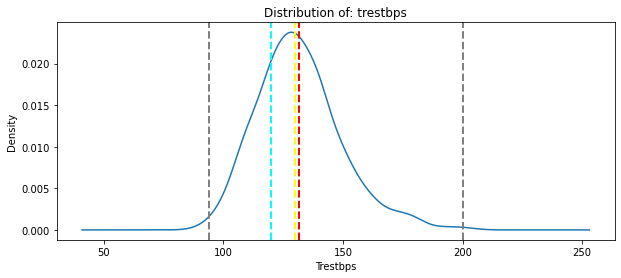


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 246.26
Median (yellow) = 240.0
Mode (cyan) = 197


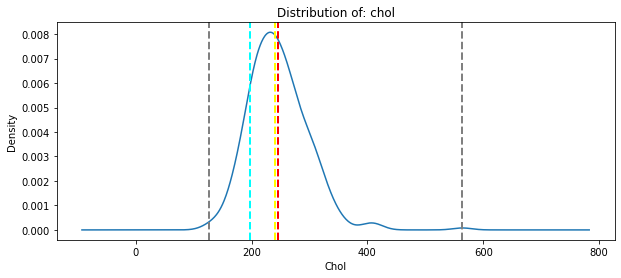


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 149.65
Median (yellow) = 153.0
Mode (cyan) = 162


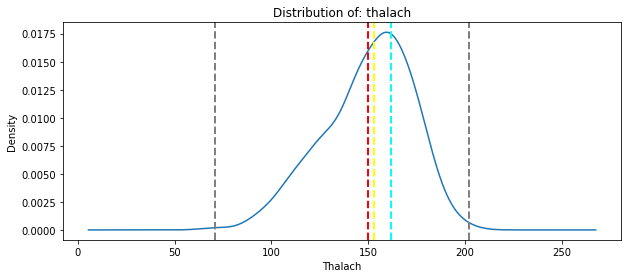


-----------------------------------------------------------------------------------------------------------------------------

Mean (red) = 1.04
Median (yellow) = 0.8
Mode (cyan) = 0.0


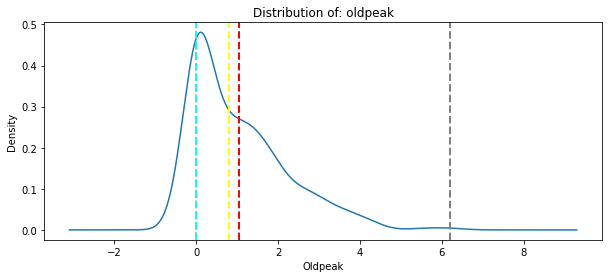


-----------------------------------------------------------------------------------------------------------------------------



In [14]:
# Create a distribution graph for each numeric feature column
for col in numeric:
    distribution(col)
    print('\n''-----------------------------------------------------------------------------------------------------------------------------''\n')

No heart disease: y = 0.57*x + 102.41
Heart disease present: y = 0.47*x + 104.89


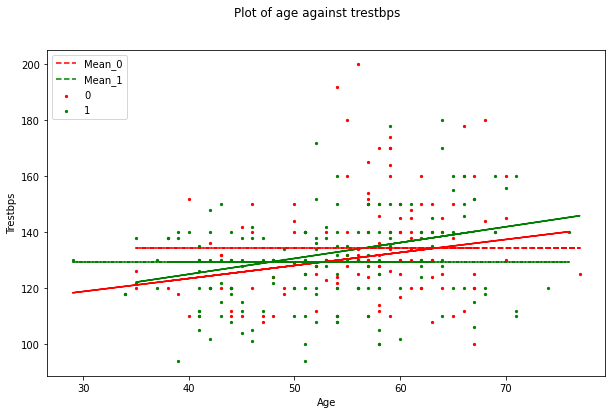


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.7*x + 211.5
Heart disease present: y = 1.44*x + 166.53


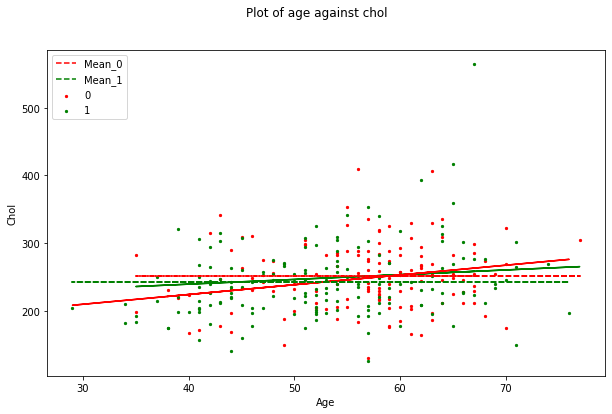


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = -0.38*x + 160.43
Heart disease present: y = -1.06*x + 213.88


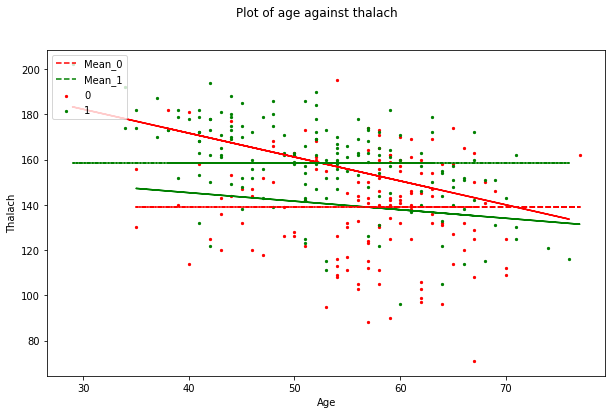


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.02*x + 0.63
Heart disease present: y = 0.01*x + -0.17


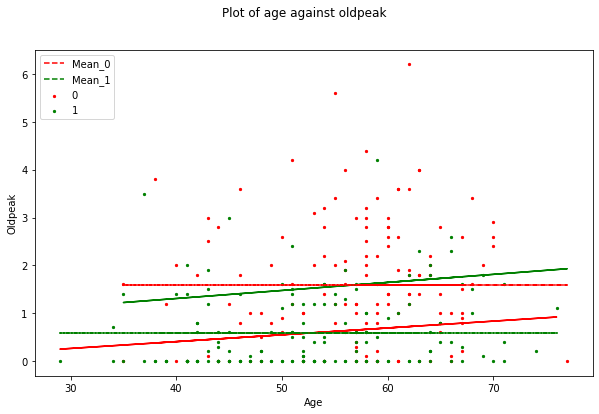


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.1*x + 42.87
Heart disease present: y = 0.16*x + 31.52


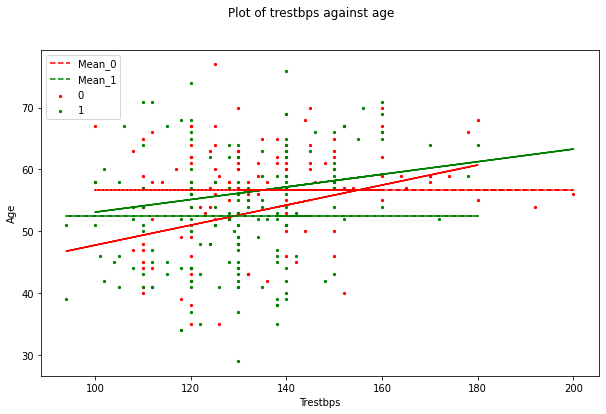


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.36*x + 203.06
Heart disease present: y = 0.31*x + 202.28


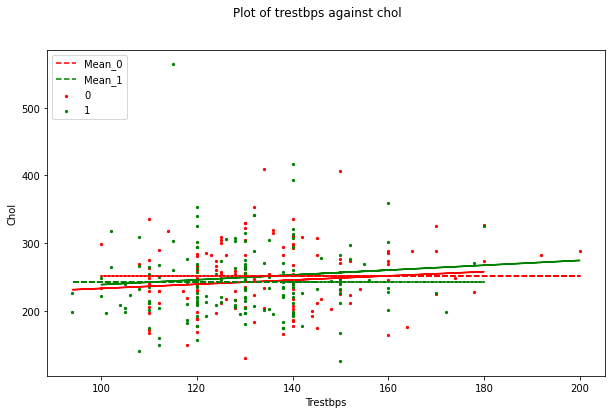


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.01*x + 138.19
Heart disease present: y = 0.03*x + 154.17


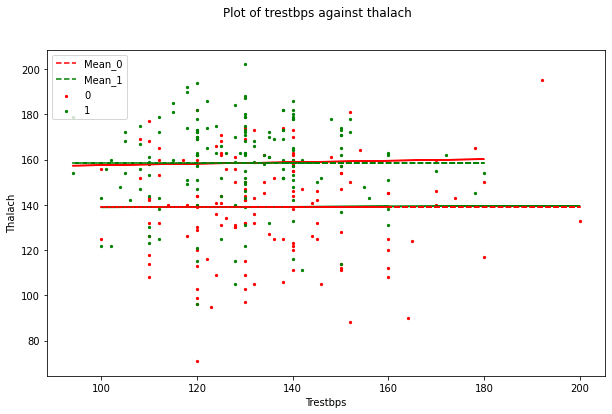


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.01*x + 0.39
Heart disease present: y = 0.01*x + -0.55


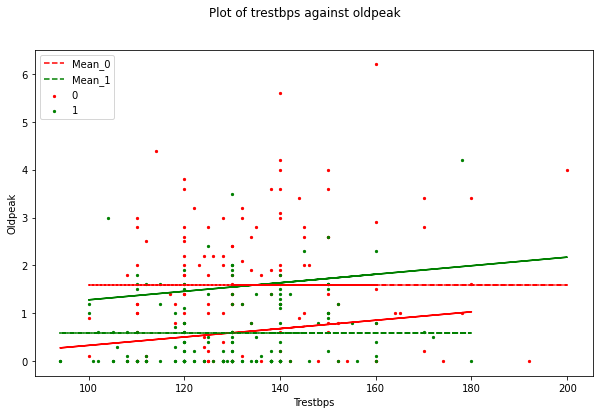


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.02*x + 52.05
Heart disease present: y = 0.05*x + 41.39


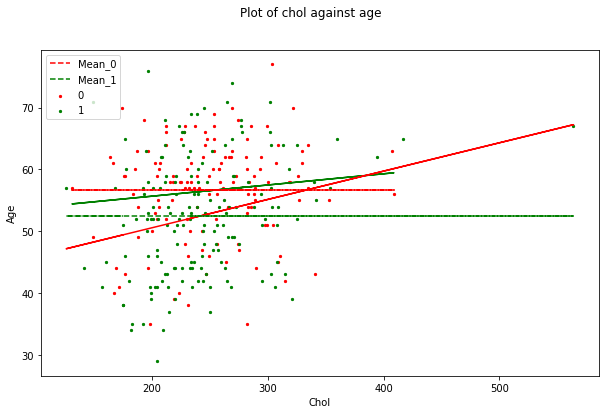


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.05*x + 121.53
Heart disease present: y = 0.03*x + 122.48


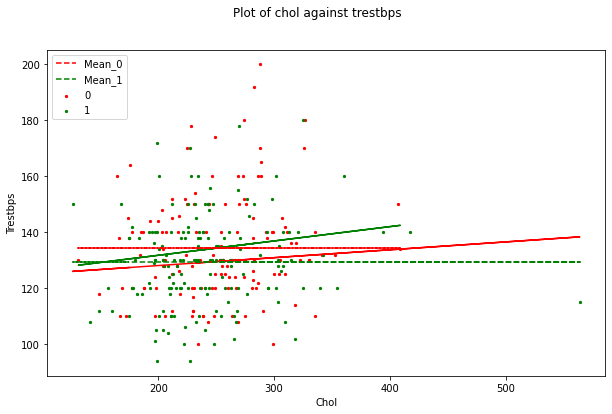


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.02*x + 133.94
Heart disease present: y = 0.01*x + 157.21


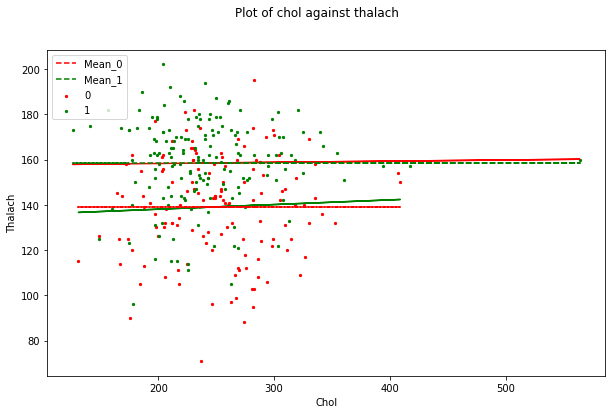


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = -0.0*x + 1.65
Heart disease present: y = 0.0*x + 0.38


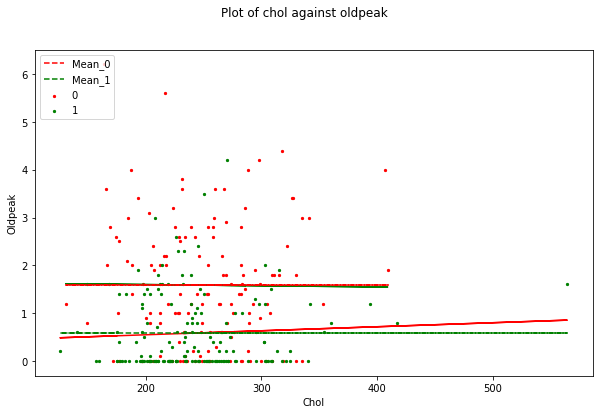


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = -0.05*x + 63.11
Heart disease present: y = -0.26*x + 94.0


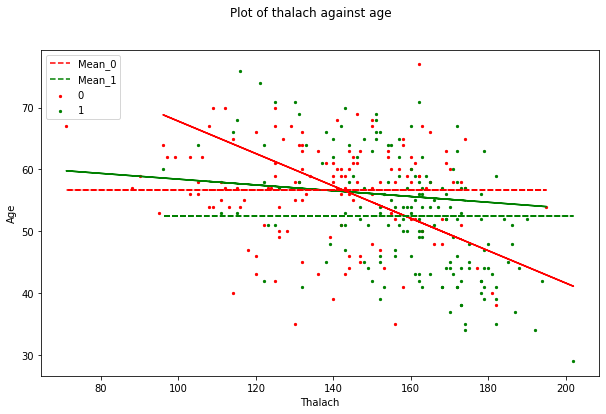


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.0*x + 133.75
Heart disease present: y = 0.02*x + 125.56


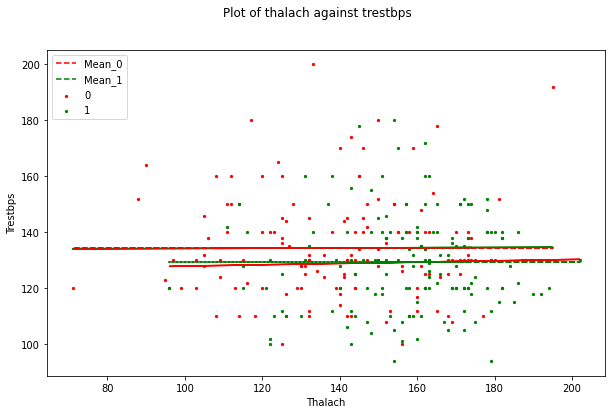


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.1*x + 237.39
Heart disease present: y = 0.04*x + 235.83


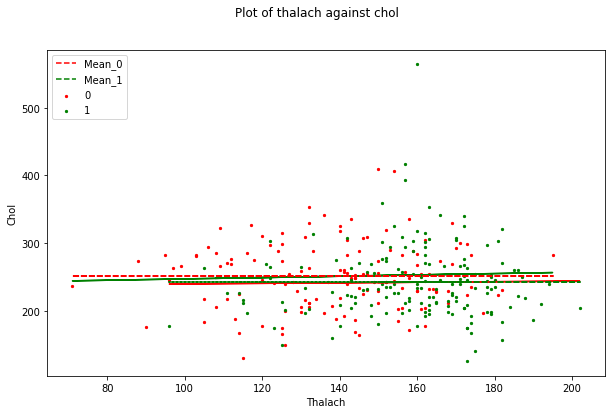


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = -0.01*x + 3.29
Heart disease present: y = -0.01*x + 1.76


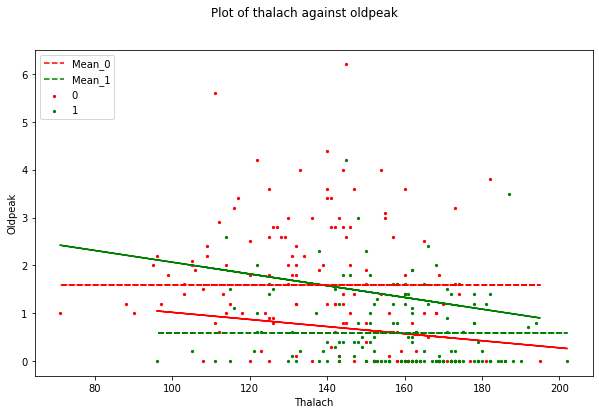


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 0.63*x + 55.6
Heart disease present: y = 2.14*x + 51.25


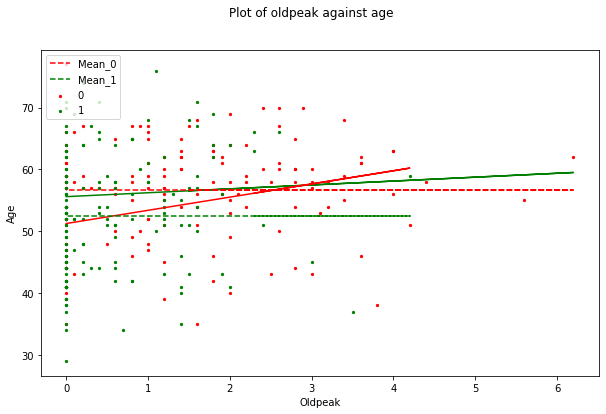


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = 1.85*x + 131.47
Heart disease present: y = 3.76*x + 127.11


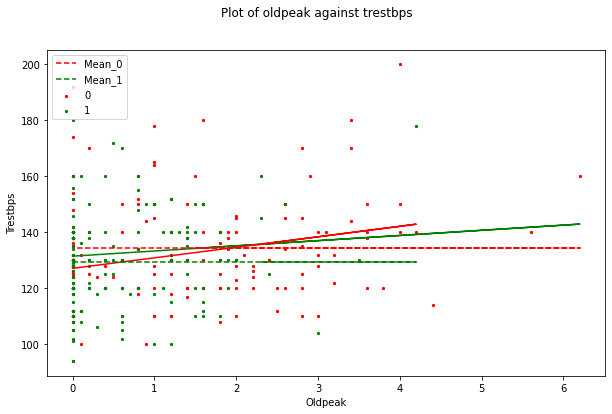


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = -0.36*x + 251.65
Heart disease present: y = 3.96*x + 239.92


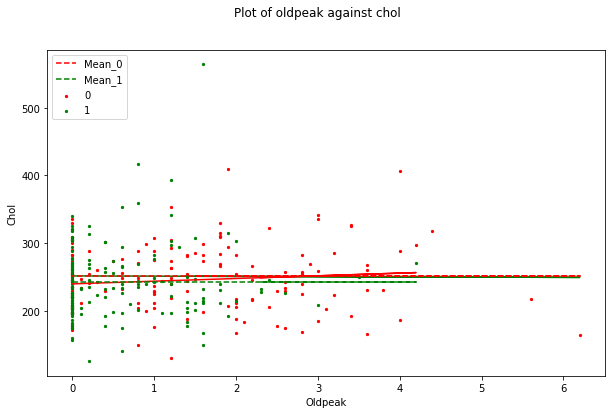


-----------------------------------------------------------------------------------------------------------------------------

No heart disease: y = -3.71*x + 144.98
Heart disease present: y = -4.47*x + 161.07


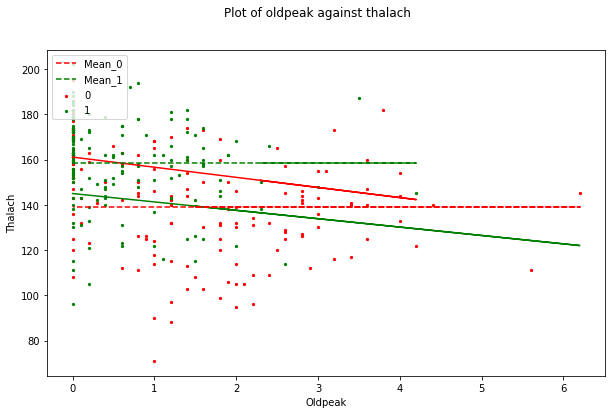


-----------------------------------------------------------------------------------------------------------------------------



In [15]:
# Create a scatter plot for each numeric feature column against every other numeric feature column
for col1 in numeric:
    for col2 in numeric:
        if col1 != col2:
            scatter(col1,col2)
            print('\n''-----------------------------------------------------------------------------------------------------------------------------''\n')

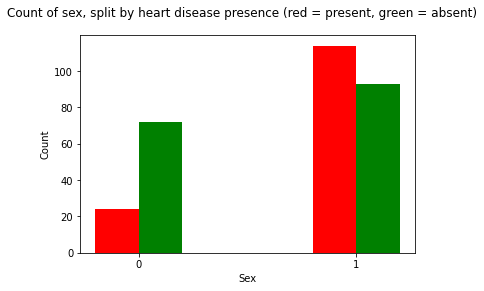


-----------------------------------------------------------------------------------------------------------------------------



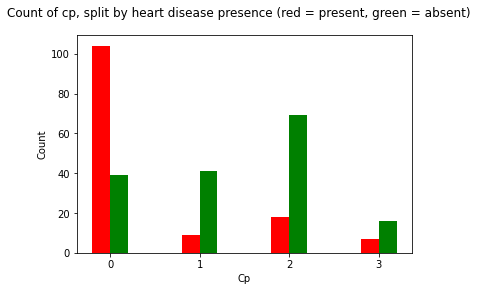


-----------------------------------------------------------------------------------------------------------------------------



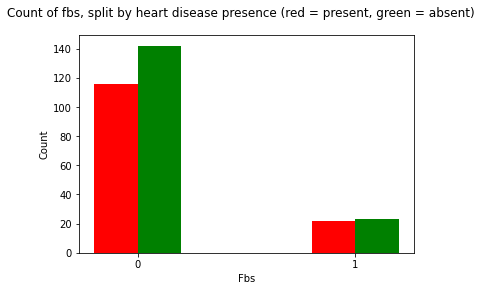


-----------------------------------------------------------------------------------------------------------------------------



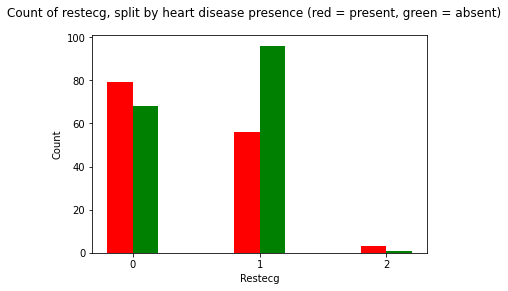


-----------------------------------------------------------------------------------------------------------------------------



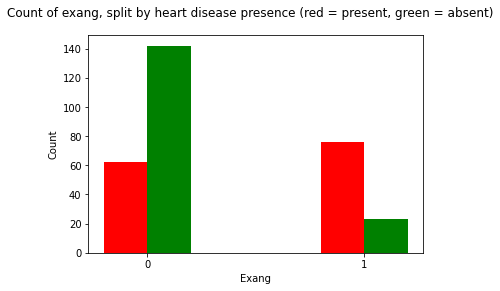


-----------------------------------------------------------------------------------------------------------------------------



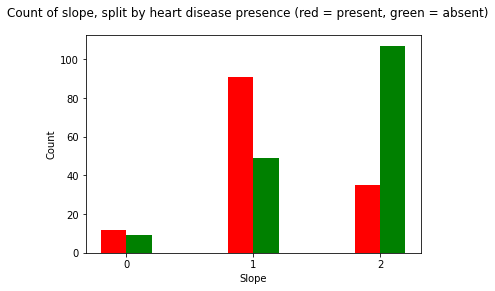


-----------------------------------------------------------------------------------------------------------------------------



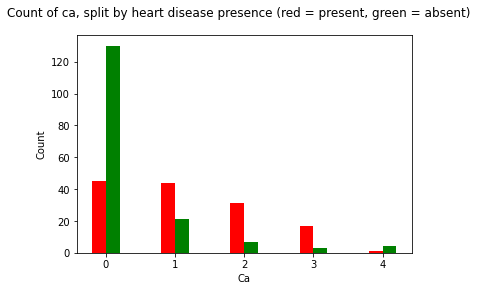


-----------------------------------------------------------------------------------------------------------------------------



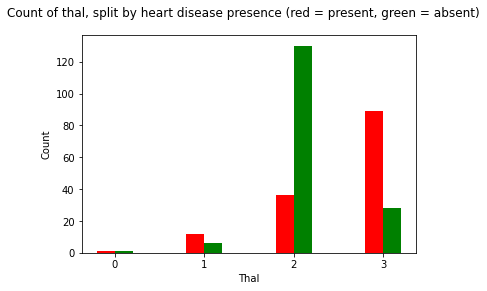


-----------------------------------------------------------------------------------------------------------------------------



In [16]:
# Create a bar graph for each categorical feature column
for col in categorical:
    categorical_bar(col)
    print('\n''-----------------------------------------------------------------------------------------------------------------------------''\n')

## Section 2: transforming the data and applying a machine learning model

In [17]:
# Create list of feature columns
features = list(df.columns[0:-1])

# Create list of label column
label = ['target']

In [18]:
# Split dataframe into np array of features and np array of label
df_x, df_y = df[features].values, df[label].values

In [19]:
# Split data into stratified sample of training (75%) and test data (25%)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.250, random_state=0, stratify=df_y)
print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 227, Test Set: 76 



In [20]:
# Function takes a scaler and classifier 
def training(scaler, classifier):
    
    # Define numeric and categoric columns
    numeric = [-1,-2,-3,-4,-5,-6]
    categoric = [1, 2, 5, 6, 8, 12, 10]

    # Create column transformer for one-hot encoding categorical fields
    encoder = make_column_transformer(
        (OneHotEncoder(), categoric),
        remainder = 'passthrough'
    )

    # Create column transformer for scaling numeric fields
    scaler2 = make_column_transformer(
        (scaler, numeric),
        remainder = 'passthrough'
    )

    # Create pipeline to encode categoric columns, scale numeric columns, then apply classifier
    pipeline = make_pipeline(encoder, scaler2, classifier)

    # Create model to fit the pipeline to training data
    model = pipeline.fit(x_train, y_train.ravel())

    # Predict label values based on model
    predictions = model.predict(x_test)
    
    
    # Analyse the metrics
    
    # Predict the probability of 0 or 1
    prob = model.predict_proba(x_test)
    
    # Calculate the accuracy, precision and recall of the model by comparing the predicted value to the actual label
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    auc = roc_auc_score(y_test, prob[:,1])
    
    # Print the metrics
    print("Overall Accuracy: " + str((round(accuracy*100,1))) + "%")
    print("Overall Precision: "+ str((round(precision*100,1))) + "%")
    print("Overall Recall: " + str((round(recall*100,1))) + "%")
    print("Overall AUC: " + str((round(auc*100,1))) + "%")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Create list of labels for confusion matrix
    hd = ['Heart Disease', 'No Heart Disease']
    
    # Show the confusion matrix
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(hd))
    plt.xticks(tick_marks, hd, rotation=45)
    plt.yticks(tick_marks, hd)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.suptitle('Scaler: ' + str(scaler) + ', Classifier: ' + str(classifier))
    plt.show()
    
    return accuracy, auc, recall, precision, model

    print('\n''-----------------------------------------------------------------------------------------------------------------------------''\n')

## Section 3: evaluating different scalers and classifiers

Overall Accuracy: 80.3%
Overall Precision: 80.2%
Overall Recall: 80.0%
Overall AUC: 85.9%


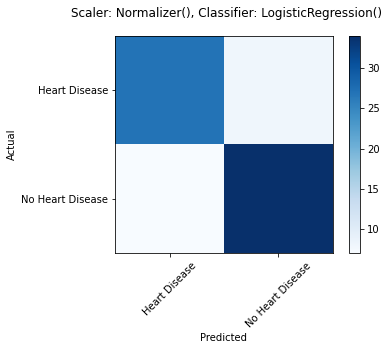

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.9%
Overall AUC: 89.5%


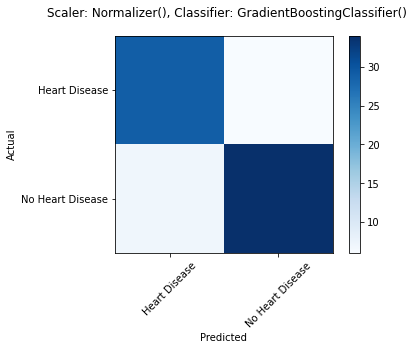

Overall Accuracy: 80.3%
Overall Precision: 80.2%
Overall Recall: 80.0%
Overall AUC: 89.6%


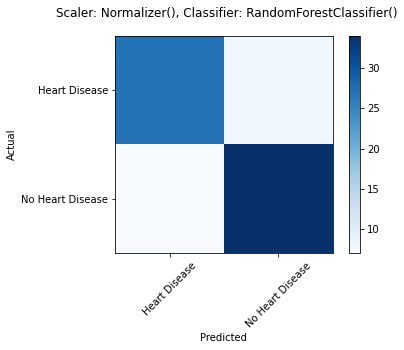

Overall Accuracy: 78.9%
Overall Precision: 79.2%
Overall Recall: 78.4%
Overall AUC: 86.4%


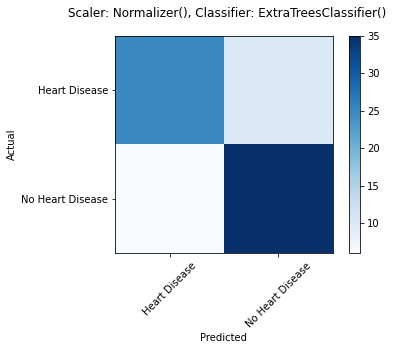

Overall Accuracy: 81.6%
Overall Precision: 81.6%
Overall Recall: 81.3%
Overall AUC: 89.3%


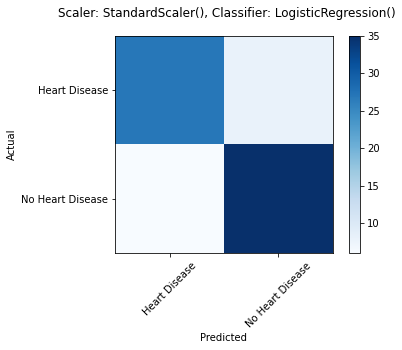

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.9%
Overall AUC: 89.2%


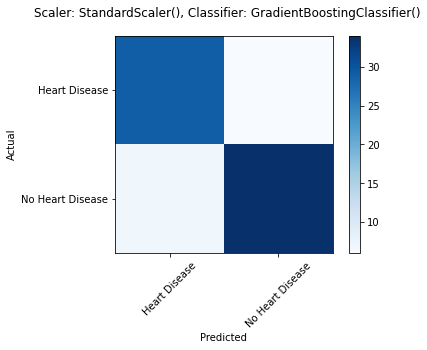

Overall Accuracy: 81.6%
Overall Precision: 81.5%
Overall Recall: 81.5%
Overall AUC: 89.2%


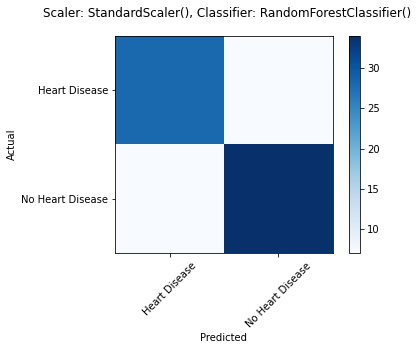

Overall Accuracy: 81.6%
Overall Precision: 81.6%
Overall Recall: 81.3%
Overall AUC: 87.9%


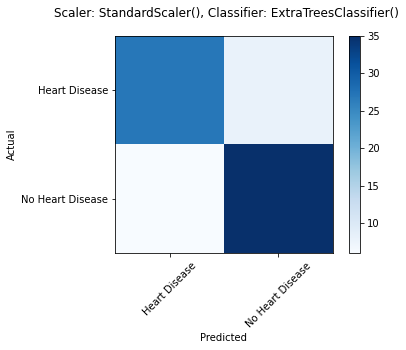

Overall Accuracy: 80.3%
Overall Precision: 80.2%
Overall Recall: 80.0%
Overall AUC: 88.2%


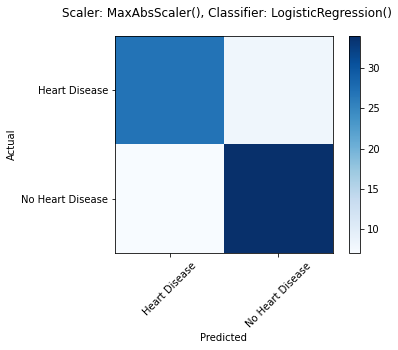

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.9%
Overall AUC: 89.2%


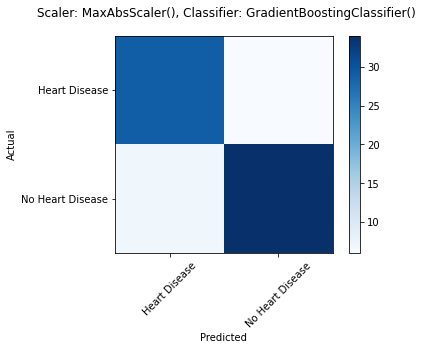

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.7%
Overall AUC: 89.9%


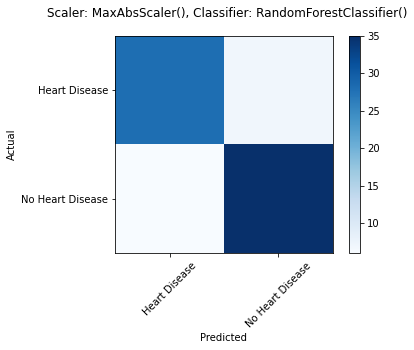

Overall Accuracy: 82.9%
Overall Precision: 83.1%
Overall Recall: 82.5%
Overall AUC: 88.7%


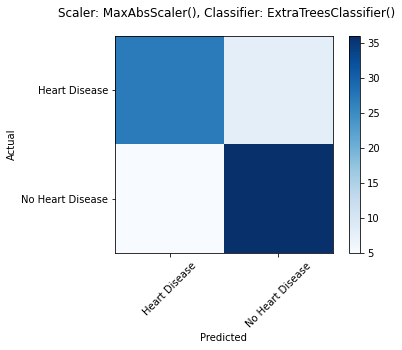

Overall Accuracy: 81.6%
Overall Precision: 81.6%
Overall Recall: 81.3%
Overall AUC: 89.3%


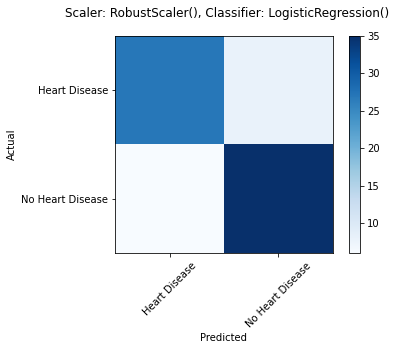

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.9%
Overall AUC: 89.1%


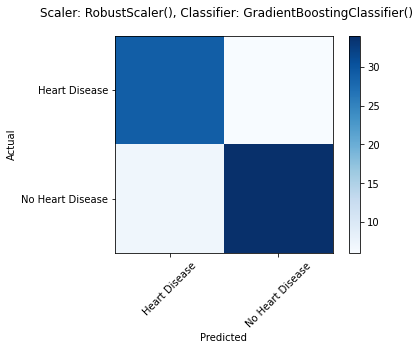

Overall Accuracy: 81.6%
Overall Precision: 81.5%
Overall Recall: 81.7%
Overall AUC: 90.0%


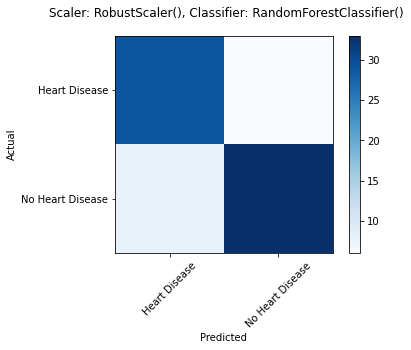

Overall Accuracy: 82.9%
Overall Precision: 83.1%
Overall Recall: 82.5%
Overall AUC: 89.4%


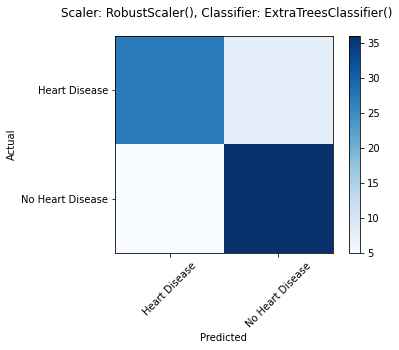

Overall Accuracy: 80.3%
Overall Precision: 80.2%
Overall Recall: 80.0%
Overall AUC: 88.3%


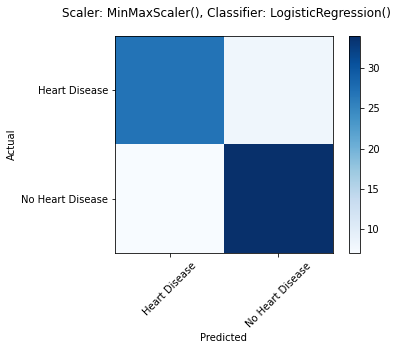

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.9%
Overall AUC: 89.2%


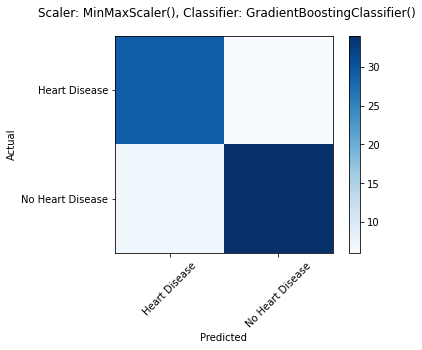

Overall Accuracy: 81.6%
Overall Precision: 81.5%
Overall Recall: 81.5%
Overall AUC: 91.0%


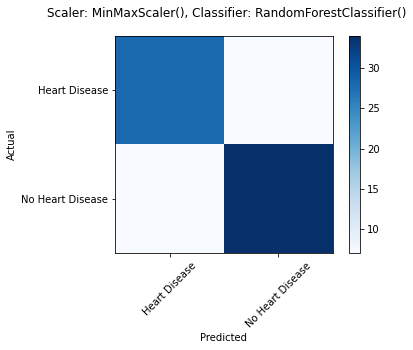

Overall Accuracy: 81.6%
Overall Precision: 81.6%
Overall Recall: 81.3%
Overall AUC: 87.3%


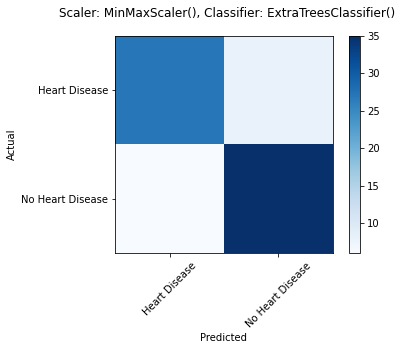

In [21]:
# Lists of plausible scalers and classifiers
scalers = [Normalizer(), StandardScaler(), MaxAbsScaler(), RobustScaler(), MinMaxScaler()]
classifiers = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), ExtraTreesClassifier()]

# Analyse how each scaler and classifier performs
for scaler in scalers:
    for classifier in classifiers:
        training(scaler, classifier)

Overall Accuracy: 81.6%
Overall Precision: 81.6%
Overall Recall: 81.3%
Overall AUC: 89.3%


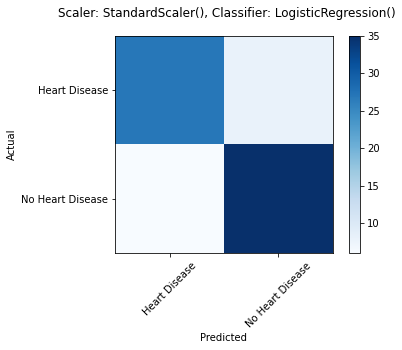

Overall Accuracy: 82.9%
Overall Precision: 82.8%
Overall Recall: 82.9%
Overall AUC: 89.2%


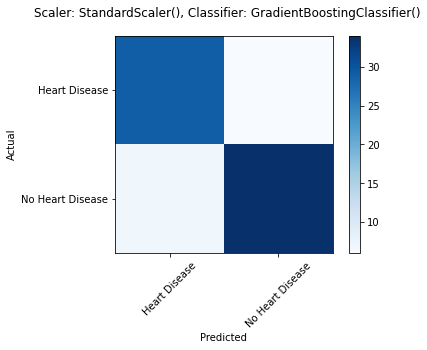

Overall Accuracy: 84.2%
Overall Precision: 84.7%
Overall Recall: 83.7%
Overall AUC: 89.2%


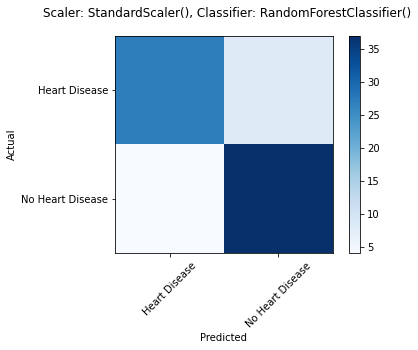

Overall Accuracy: 80.3%
Overall Precision: 80.2%
Overall Recall: 80.0%
Overall AUC: 88.9%


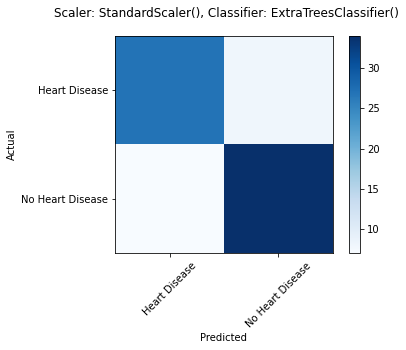

In [22]:
# Use standard scaler
for classifier in classifiers:
    training(StandardScaler(), classifier)

In [23]:
%%capture
# Create lists for each classifier
accuracies_ETC = []
accuracies_LR = []
accuracies_GBC = []
accuracies_RFC = []

# Define number of iterations
i = 100

# Create list of accuracies over 100 iterations for each classifier
while i > 0:
    accuracy_ETC = training(StandardScaler(), ExtraTreesClassifier())
    accuracy_LR = training(StandardScaler(), LogisticRegression())
    accuracy_GBC = training(StandardScaler(), GradientBoostingClassifier())
    accuracy_RFC = training(StandardScaler(), RandomForestClassifier())
    accuracies_ETC.append(accuracy_ETC[0])
    accuracies_LR.append(accuracy_LR[0])
    accuracies_GBC.append(accuracy_GBC[0])
    accuracies_RFC.append(accuracy_RFC[0])
    i = i - 1

In [24]:
# Calculate average accuracy for each classifier
mean_accuracy_ETC = sum(accuracies_ETC)/(len(accuracies_ETC))
mean_accuracy_LR = sum(accuracies_LR)/(len(accuracies_LR))
mean_accuracy_GBC = sum(accuracies_GBC)/(len(accuracies_GBC))
mean_accuracy_RFC = sum(accuracies_RFC)/(len(accuracies_RFC))

# View average accuracies
print(mean_accuracy_ETC)
print(mean_accuracy_LR)
print(mean_accuracy_GBC)
print(mean_accuracy_RFC)

0.8200000000000003
0.8157894736842098
0.8289473684210538
0.8135526315789475


## Section 4: tuning parameters

### 4.1 Learning rate

In [25]:
%%capture
# Create list of learning rates to try and a list of associated AUC scores
learning_rates = np.arange(0.01, 1.5, 0.01).tolist()
auc_score=[]

# Trial each learning rate to find the optimum AUC score
for rate in learning_rates:
    accuracy, auc, recall, precision, model = training(StandardScaler(), GradientBoostingClassifier(learning_rate=rate))
    auc_score.append(auc)

Text(0, 0.5, 'AUC score')

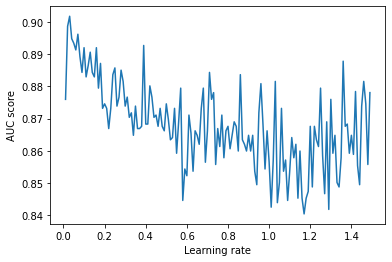

In [26]:
# Plot the learning rate against AUC score to find peak AUC score
plt.plot(learning_rates, auc_score)
plt.xlabel('Learning rate')
plt.ylabel('AUC score')

### 4.2 Number of estimators

In [27]:
%%capture
# Create list of estimators to try and a list of associated AUC scores
n_estimators = np.arange(1, 200, 1).tolist()
auc_score=[]

# Trial each number of estimators to find the optimum AUC score
for n in n_estimators:
    accuracy, auc, recall, precision, model = training(StandardScaler(), GradientBoostingClassifier(learning_rate=0.03, n_estimators=n))
    auc_score.append(auc)

Text(0, 0.5, 'AUC score')

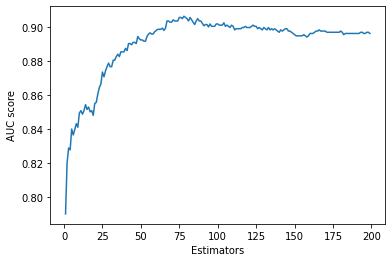

In [28]:
# Plot the number of estimators against AUC score to find peak AUC score
plt.plot(n_estimators, auc_score)
plt.xlabel('Estimators')
plt.ylabel('AUC score')

### 4.3 Max depth

In [29]:
%%capture
# Create list of max depths to try and a list of associated AUC scores
max_depth = np.arange(0.1, 50, 0.5).tolist()
auc_score=[]

# Trial each max depth to find the optimum AUC score
for depth in max_depth:
    accuracy, auc, recall, precision, model = training(StandardScaler(), GradientBoostingClassifier(learning_rate=0.03, n_estimators=74, max_depth=depth))
    auc_score.append(auc)

Text(0, 0.5, 'AUC score')

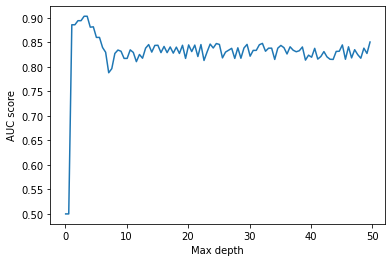

In [30]:
# Plot the max depth against AUC score to find peak AUC score
plt.plot(max_depth, auc_score)
plt.xlabel('Max depth')
plt.ylabel('AUC score')

### 4.4 Min_samples_split

In [31]:
%%capture
# Create list of min samples split to trial and a list of associated AUC scores
min_samples = np.linspace(0.001, 1.0, 100).tolist()
auc_score=[]

# Trial each min samples split to find the optimum AUC score
for i in min_samples:
    accuracy, auc, recall, precision, model = training(StandardScaler(), GradientBoostingClassifier(learning_rate=0.03, n_estimators=74, max_depth=3.5, min_samples_split=i))
    auc_score.append(auc)

Text(0, 0.5, 'AUC score')

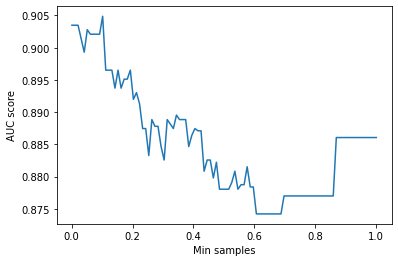

In [32]:
# Plot the min samples against AUC score to find peak AUC score
plt.plot(min_samples, auc_score)
plt.xlabel('Min samples')
plt.ylabel('AUC score')

### 4.5 Minimum samples leafs 

In [33]:
%%capture
# Create list of min samples leafs to trial and a list of associated AUC scores
min_samples_leafs = np.linspace(0.001, 0.3, 100).tolist()
auc_score=[]

# Trial each min samples leafs to find the optimum AUC score
for i in min_samples_leafs:
    accuracy, auc, recall, precision, model = training(StandardScaler(), GradientBoostingClassifier(learning_rate=0.03, n_estimators=74, max_depth=3.5, min_samples_split=0.092, min_samples_leaf=i))
    auc_score.append(auc)

Text(0, 0.5, 'AUC score')

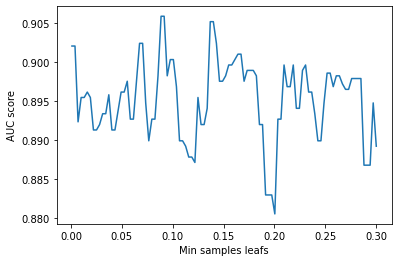

In [34]:
# Plot the min samples leafs against AUC score to find peak AUC score
plt.plot(min_samples_leafs, auc_score)
plt.xlabel('Min samples leafs')
plt.ylabel('AUC score')

## Section 5: applying the final model to new data

Overall Accuracy: 81.6%
Overall Precision: 81.5%
Overall Recall: 81.5%
Overall AUC: 90.6%


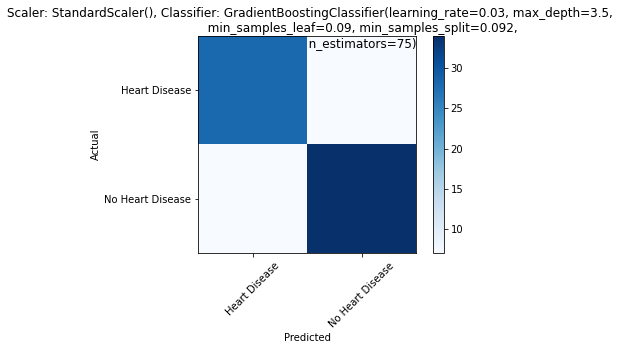

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  [1, 2, 5, 6, 8, 12, 10])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [-1, -2, -3, -4, -5, -6])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.03, max_depth=3.5,
                                            min_samples_leaf=0.09,
                                            min_samples_split=0.092,
                                            n_estimators=75))])


In [35]:
# Define the final model based on above analysis
accuracy, auc, recall, precision, model = training(StandardScaler(), GradientBoostingClassifier(
    learning_rate=0.03,
    n_estimators=75,
    max_depth=3.5,
    min_samples_split=0.092,
    min_samples_leaf=0.09)
        )

# Print final model
print(model)

In [36]:
# Define model file name and save as pkl file
filename = 'heart_disease_model.pkl'
joblib.dump(model, filename)

['heart_disease_model.pkl']

In [37]:
# Load model from file
model = joblib.load(filename)

In [38]:
# Define heart disease options for corresponding prediction
hd_options = ['Heart disease present', 'Heart disease absent']

In [39]:
# Define new data
x_new = np.array([[58, 0, 1, 180, 280, 0, 0, 150, 1, 3.2, 1, 0, 2], [87, 1, 3, 289, 312, 1, 1, 150, 1, 3.2, 2, 1, 3], [22, 0, 2, 150, 120, 0, 1, 120, 0, 2.1, 0, 1, 2], [44, 0, 2, 201, 222, 0, 0, 150, 1, 3.7, 1, 2, 3]])

In [40]:
# Make predictions for the new data
x_new_pred = model.predict(x_new)

In [41]:
# Print the model prediction for the new data
for i in x_new_pred:
    print(str(hd_options[i]))

Heart disease absent
Heart disease present
Heart disease absent
Heart disease present
